In [57]:
import os
from datetime import datetime

import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

sns.set()

In [58]:
datafile="data/hidden_states_4.csv"
data = pd.read_csv(datafile)
x = data.iloc[:,3:131]
data

,RID,DX,DX_mask,hidden_0,hidden_1,hidden_2,hidden_3,hidden_4,hidden_5,hidden_6,...,hidden_119,hidden_120,hidden_121,hidden_122,hidden_123,hidden_124,hidden_125,hidden_126,hidden_127,cluster
0,2.0,0.0,1.0,-0.283706,-0.003384,-0.150580,-0.053668,0.172009,0.433708,0.346609,...,0.443763,0.607214,-0.467554,0.110311,0.655745,-0.295100,0.117934,0.070489,-0.136524,1
1,3.0,2.0,1.0,0.231138,0.277763,0.725193,-0.049483,0.059681,-0.623570,0.053898,...,-0.274681,-0.036543,0.044211,0.520856,0.014525,-0.015695,0.429772,0.023273,0.239048,2
2,6.0,1.0,1.0,0.640640,0.049897,-0.148219,-0.260831,-0.025210,0.028074,0.099862,...,-0.614915,0.012667,0.264729,0.272309,-0.185525,-0.032290,0.020192,0.322852,0.304855,0
3,7.0,2.0,1.0,0.197155,0.366333,0.727745,-0.031991,0.039240,-0.726173,0.089154,...,-0.297243,-0.072891,0.113717,0.399242,0.024513,-0.013651,0.490023,0.028959,0.273630,2
4,8.0,0.0,1.0,-0.293696,0.019522,-0.098136,-0.049895,0.181402,0.428601,0.672303,...,0.237732,0.357086,-0.441326,0.056989,0.590022,-0.258199,0.046442,0.394232,-0.495154,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12007,5289.0,0.0,0.0,-0.027378,0.030254,-0.120709,-0.139588,0.266678,0.522962,0.428292,...,0.050628,0.446987,-0.406643,0.150359,0.447474,-0.396539,0.115368,0.454544,-0.502427,1
12008,5290.0,0.0,0.0,-0.243421,0.032226,-0.085060,-0.224253,0.290341,0.547251,0.505058,...,0.092333,0.564644,-0.462175,0.044536,0.460507,-0.443983,0.119181,0.512733,-0.407441,1
12009,5292.0,0.0,0.0,-0.151342,0.042596,-0.322349,-0.058529,0.252902,0.491060,0.454201,...,0.061670,0.559146,-0.444435,0.038448,0.458217,-0.551529,0.052710,0.454187,-0.483363,1
12010,5294.0,0.0,0.0,-0.055134,0.062496,-0.276021,-0.139060,0.188104,0.463194,0.532173,...,-0.098300,0.403012,-0.424136,0.162510,0.441631,-0.368709,0.173729,0.486953,-0.356354,3


In [54]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(x.values)

pca_result = pd.DataFrame({"PCA-0":pca_result[:,0], "PCA-1":pca_result[:,1], "PCA-2":pca_result[:,2], "DX":data["DX"], "cluster":data["cluster"]})

In [55]:
pca.explained_variance_ratio_

array([0.49766825, 0.27802753, 0.04430007, 0.03143186])

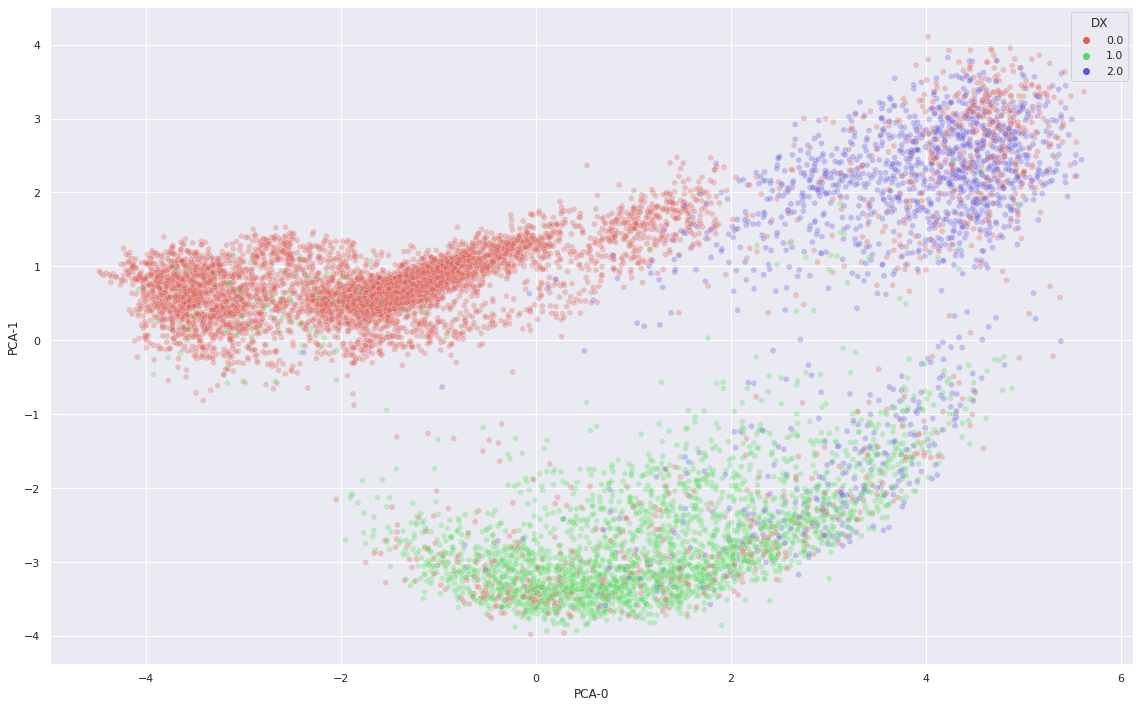

In [95]:
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="PCA-0", y="PCA-1",
    hue="DX",
    palette=sns.color_palette("hls", 3),
    data=pca_result,
    legend="full",
    alpha=0.3
)
plt.tight_layout()
#plt.savefig("figures/hidden_states_pca_color_cluster.png")

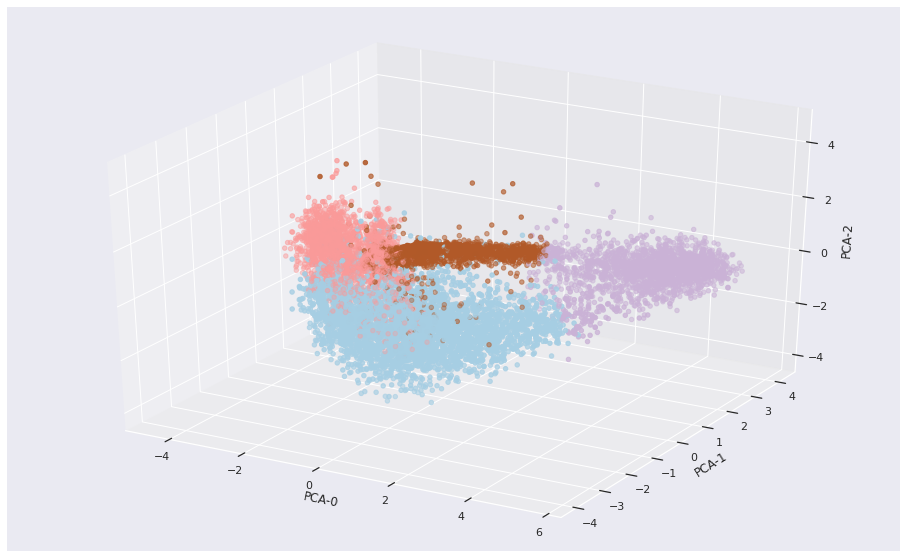

In [93]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_result["PCA-0"],
    ys=pca_result["PCA-1"],
    zs=pca_result["PCA-2"],
    c=pca_result["cluster"], 
    cmap='Paired'
)
ax.set_xlabel('PCA-0')
ax.set_ylabel('PCA-1')
ax.set_zlabel('PCA-2')
plt.savefig("figures/hidden_states_pca_color_cluster4_3d.png")